## Sales Data Analysis: Uncovering Trends and Insights from a Real-World Sales Dataset

In today’s competitive market, data-driven decision-making is crucial for businesses to optimize their sales strategies. Sales data contains valuable insights that can help organizations understand customer behavior, identify seasonal trends, and improve overall performance. By analyzing a real-world sales dataset, businesses can make informed decisions to boost revenue and enhance customer satisfaction.

## Objective

Your analysis in this mini project will focus on cleaning, exploring, and visualizing a sales dataset to extract meaningful insights using python and data visualization libraries.

## About the Dataset

The **[dataset](https://drive.google.com/file/d/1V6HTxMsNQswvL_K39UWB7dh8Un8f4oz7/view?usp=sharing)** used in this analysis is a real-world sales dataset containing transaction records from a retail business. It includes the following key features:

- `OrderID`: The id or the order that was placed.
- `Date`: The date the order was placed.
- `CustomerID`: The customer ID that represents the customer who made the purchase.
- `Product`: The class of product that was purchased.
- `Quantity`: The quantity of the product that was purchased.
- `Price`: Unit price of the product in dollars.
- `Total`: The total cost of the purchase in dollars.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1V6HTxMsNQswvL_K39UWB7dh8Un8f4oz7')
data

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19
...,...,...,...,...,...,...,...
195,196,2024-04-22,C019,Monitor,1,200,181.37
196,197,2024-11-13,C017,Laptop,1,1000,1066.13
197,198,2024-02-21,C019,Tablet,1,400,387.62
198,199,2024-09-24,C005,Phone,2,600,1265.72


In [ ]:
#Display the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     200 non-null    int64  
 1   Date        200 non-null    object 
 2   CustomerID  200 non-null    object 
 3   Product     190 non-null    object 
 4   Quantity    200 non-null    int64  
 5   Price       200 non-null    int64  
 6   Total       194 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB


There are mising values in the following columns; 'Product' (10 missing values), and 'Total' has 6 missing values.

In [ ]:
#Display the count of the missing values
data.isna().sum()

,0
OrderID,0
Date,0
CustomerID,0
Product,10
Quantity,0
Price,0
Total,6


In [ ]:
#Fill the missing values in the total column with the median value
data['Total'] = data['Total'].fillna(data['Total'].median())

data.head(10)

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19
5,6,2024-07-07,C017,Laptop,2,1000,1882.00
6,7,2024-01-21,C017,NaN,1,1000,975.85
7,8,2024-04-12,C002,Monitor,2,200,434.12
8,9,2024-05-01,C002,Phone,1,600,626.59
9,10,2024-08-02,C005,Phone,1,600,545.77


In [ ]:
#Remove the mising values in the product column

data = data.dropna()
data.head(10)

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19
5,6,2024-07-07,C017,Laptop,2,1000,1882.00
7,8,2024-04-12,C002,Monitor,2,200,434.12
8,9,2024-05-01,C002,Phone,1,600,626.59
9,10,2024-08-02,C005,Phone,1,600,545.77
10,11,2024-11-26,C001,Phone,1,600,633.78


After removing the missing values from the product column, the dataset has 190 rows and 7 columns

In [ ]:
#Display the count of each item in the product column
data['Product'].value_counts()

,count
Product,
Laptop,76
Phone,59
Tablet,31
Monitor,15
Headphones,9


Laptop is the most common product in the data set, while headphones are few.

In [ ]:
#grouping the data by product and finding the following aggregates; count, median, mean, and sum
data.groupby(['Product'])[['Quantity', 'Price', 'Total']].agg(['count', 'median', 'mean','sum'])

Quantity                       Price                        Total  \
              count median      mean  sum count  median    mean    sum count   
Product                                                                        
Headphones        9    1.0  1.333333   12     9   100.0   100.0    900     9   
Laptop           76    1.0  1.407895  107    76  1000.0  1000.0  76000    76   
Monitor          15    1.0  1.466667   22    15   200.0   200.0   3000    15   
Phone            59    1.0  1.288136   76    59   600.0   600.0  35400    59   
Tablet           31    1.0  1.354839   42    31   400.0   400.0  12400    31   

                                             
             median         mean        sum  
Product                                      
Headphones   108.21   217.053333    1953.48  
Laptop      1043.00  1393.128947  105877.80  
Monitor      214.43   294.357333    4415.36  
Phone        628.31   786.361017   46395.30  
Tablet       422.44   552.233226   17119.23

In [ ]:
data

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19
...,...,...,...,...,...,...,...
195,196,2024-04-22,C019,Monitor,1,200,181.37
196,197,2024-11-13,C017,Laptop,1,1000,1066.13
197,198,2024-02-21,C019,Tablet,1,400,387.62
198,199,2024-09-24,C005,Phone,2,600,1265.72


In [ ]:
#Convert the datatype of the date column from object to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.head()

/tmp/ipython-input-4210553425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19


**Visualizations**

In [ ]:

data_grouped = data.groupby('Date')['Total'].sum().reset_index()
data_grouped

,Date,Total
0,2024-01-02,1804.88
1,2024-01-05,396.72
2,2024-01-09,640.50
3,2024-01-13,823.94
4,2024-01-14,417.13
...,...,...
144,2024-12-16,613.79
145,2024-12-17,823.94
146,2024-12-24,2566.77
147,2024-12-25,2022.20


In [ ]:
data_grouped2 = data.groupby('Date')['Price'].sum().reset_index()
data_grouped2

,Date,Price
0,2024-01-02,1000
1,2024-01-05,400
2,2024-01-09,600
3,2024-01-13,1000
4,2024-01-14,400
...,...,...
144,2024-12-16,600
145,2024-12-17,600
146,2024-12-24,1600
147,2024-12-25,2000


In [ ]:
data_grouped3 = data.groupby('Date')['Quantity'].sum().reset_index()
data_grouped3

,Date,Quantity
0,2024-01-02,2
1,2024-01-05,1
2,2024-01-09,1
3,2024-01-13,1
4,2024-01-14,1
...,...,...
144,2024-12-16,1
145,2024-12-17,1
146,2024-12-24,3
147,2024-12-25,2


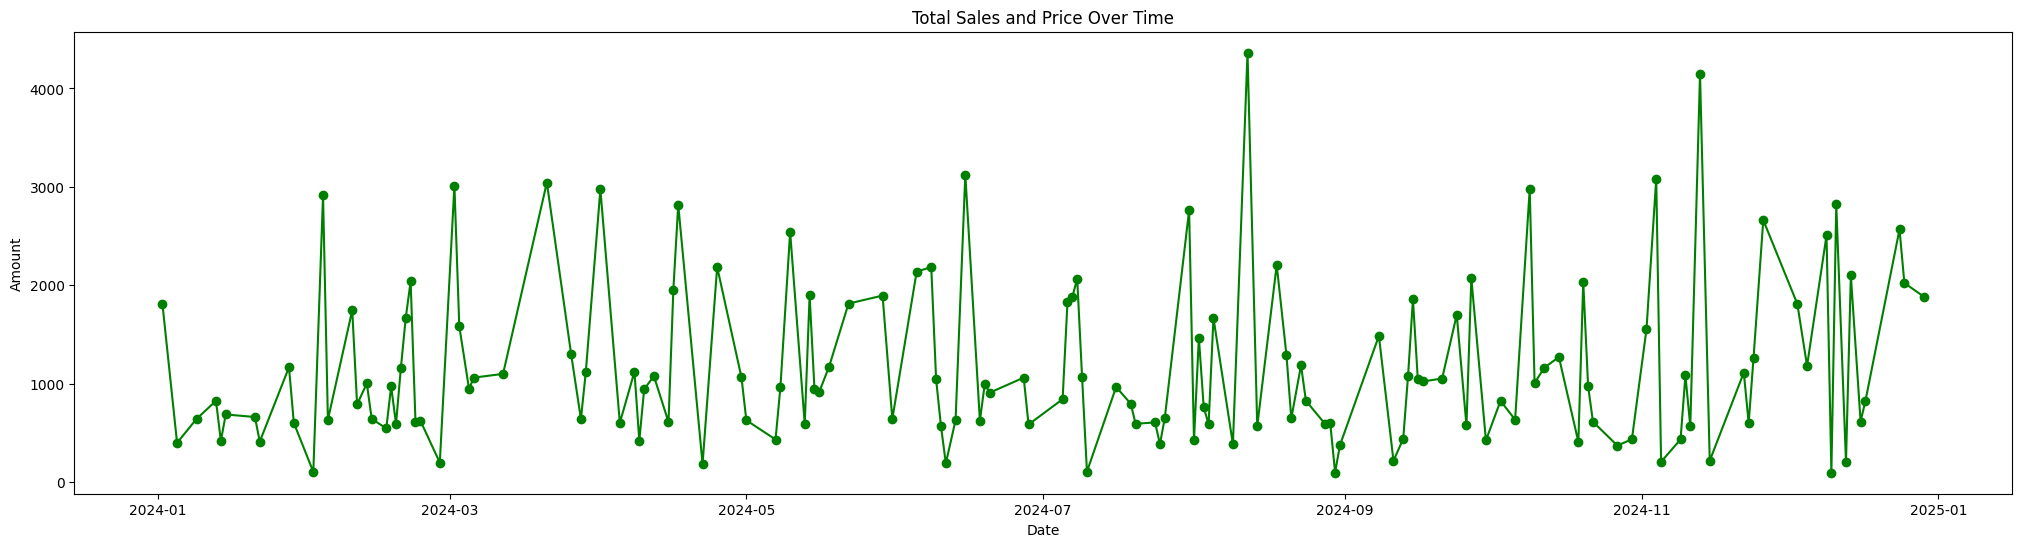

In [ ]:
#Plotting the trend of total sales over time
plt.figure(figsize=(25, 6))
plt.plot(data_grouped['Date'], data_grouped['Total'], marker='o', linestyle='-', color='g')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')




plt.show()

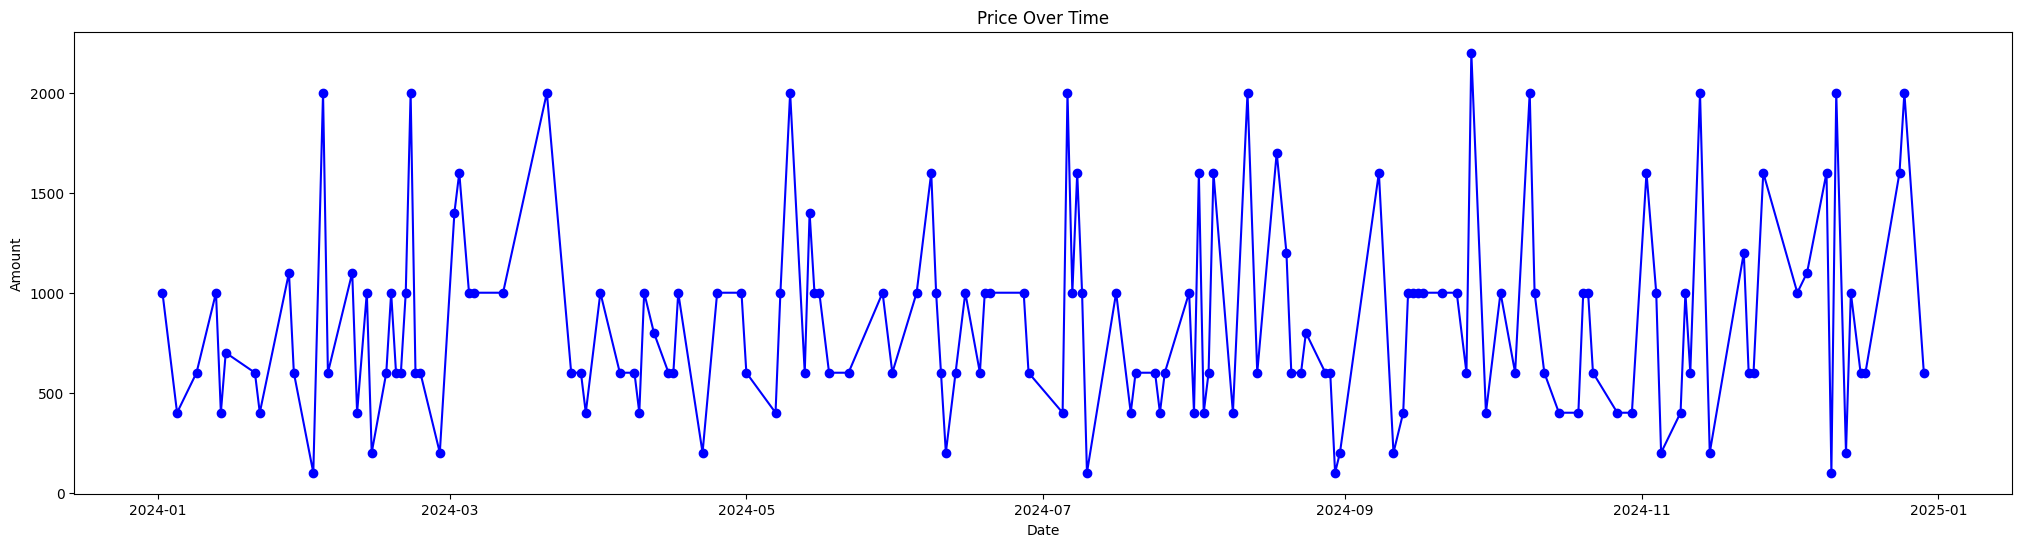

In [ ]:
#Plotting the trend of price over time
plt.figure(figsize=(25, 6))
plt.plot(data_grouped2['Date'], data_grouped2['Price'], marker='o', linestyle='-', color='b')
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')




plt.show()

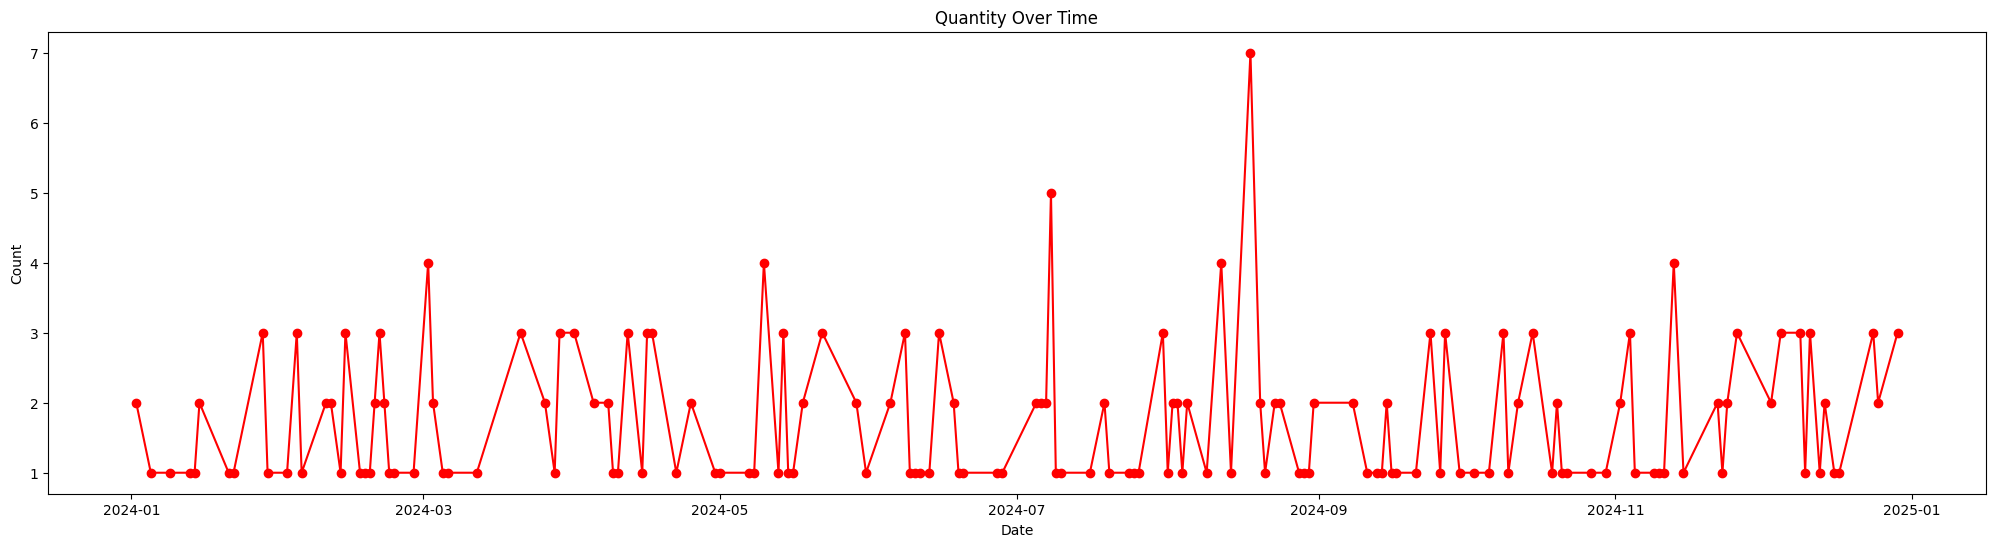

In [ ]:
#Plotting the trend of quantity over time
plt.figure(figsize=(25, 6))
plt.plot(data_grouped3['Date'], data_grouped3['Quantity'], marker='o', linestyle='-', color='r')
plt.title('Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Count')




plt.show()

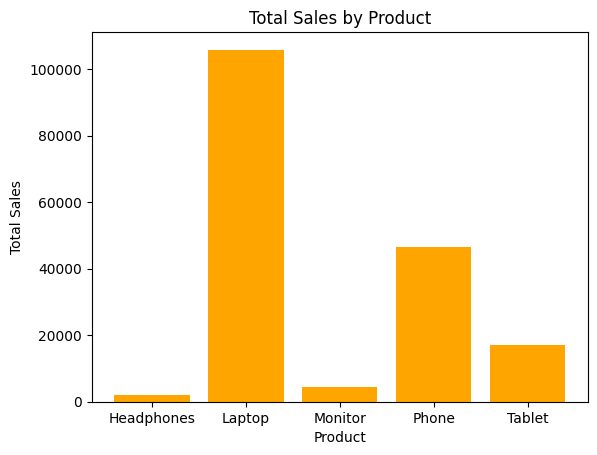

In [ ]:
data_cat = data.groupby(['Product'])[['Total']].sum()


plt.bar(data_cat.index, data_cat['Total'], color = 'orange')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')

plt.show()

,Total
Product,
Headphones,1953.48
Laptop,105877.80
Monitor,4415.36
Phone,46395.30
Tablet,17119.23
